In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200507_P60

## Si II 6355

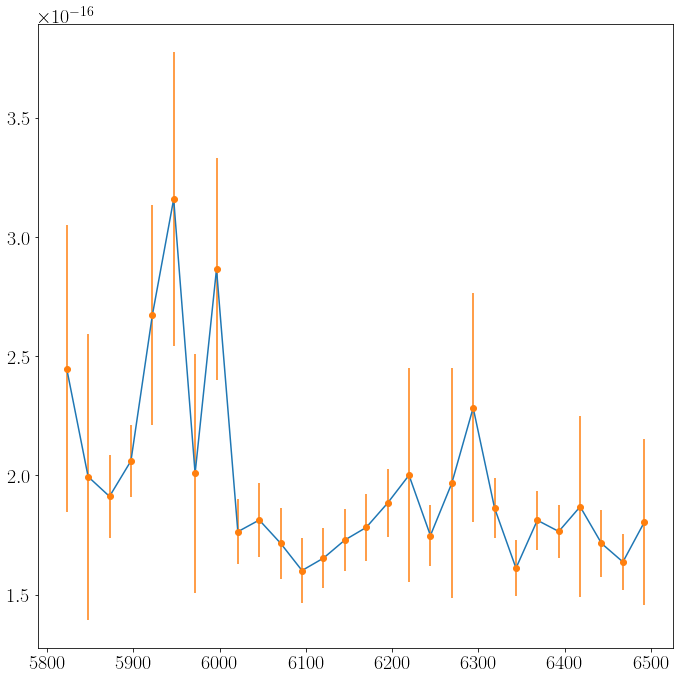

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5900, 6300, lines=[6371.359, 6347.103])

16 points within 5900.00 and 6300.00 angstroms.


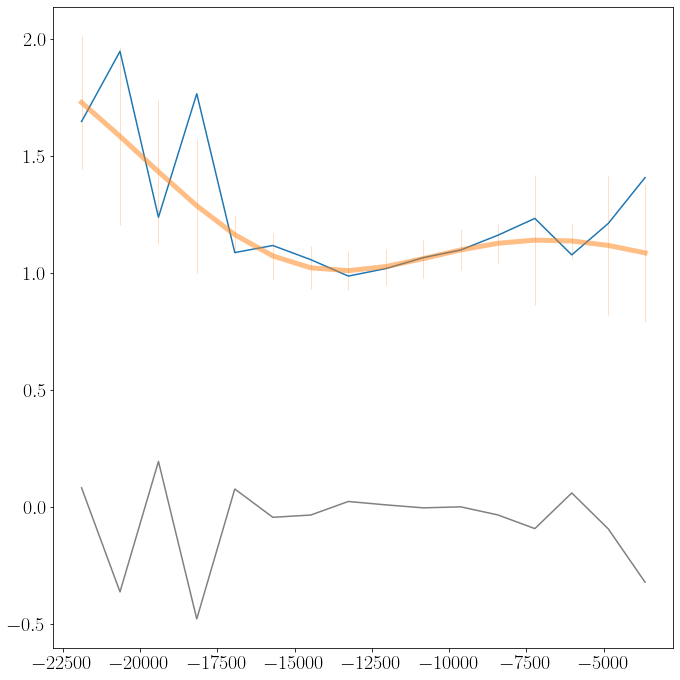

[ 1.09888370e+00  1.99107339e+00 -1.46720869e+04  1.68790301e+01
 -3.44990027e+03]


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

100%|██████████| 1500/1500 [00:15<00:00, 99.37it/s] 


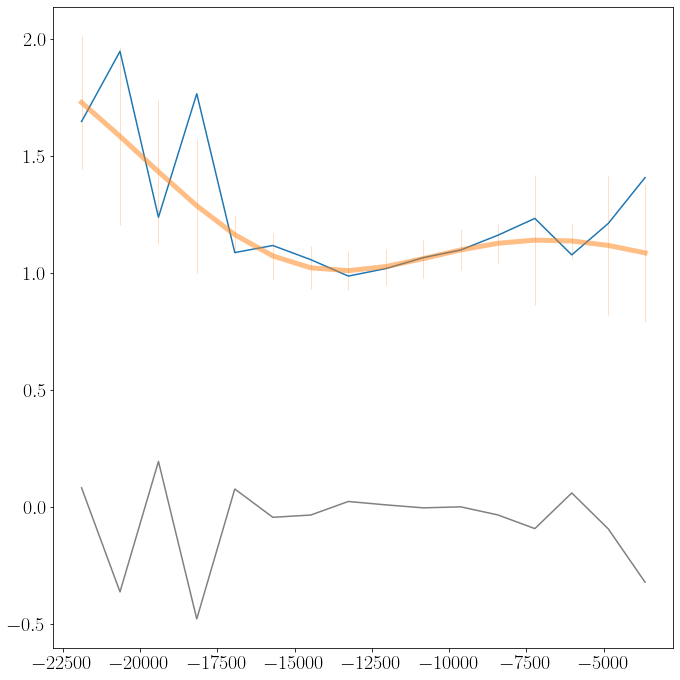

Velocity pvf: -11405 pm 9829 km/s


In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

In [ ]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

In [ ]:
Spec1.plot_line_region(7400, 8900)

In [ ]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

In [ ]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

In [ ]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=500)

In [ ]:
vel.plot_MCMC(sampler, 500)